In [85]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Загрузка и разделение данных

In [89]:
iris = load_iris()
X = iris.data
y = iris.target
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Использование LDA (линейный дискриминантный анализ)

In [90]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Оценка точности

In [91]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)

print(f"{accuracy = }")
print(f"{recall = }")
print(f"{precision = }")

accuracy = 1.0
recall = array([1., 1., 1.])
precision = array([1., 1., 1.])


# Сравнение с методом на семинаре

### Функция с семинара

In [92]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


def LDA_dimensionality(X, y, k):
    """
    X: набор данных
    y: метка
    k: целевой размер
    """
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs

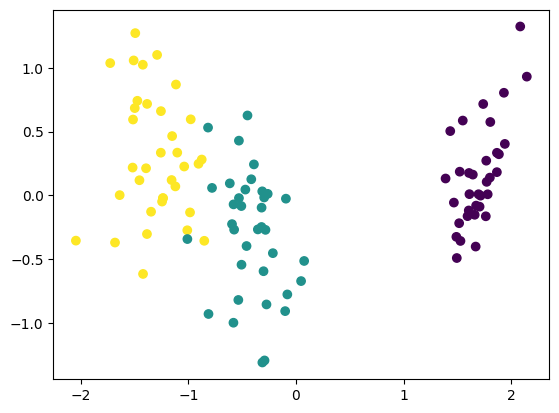

In [93]:
W = LDA_dimensionality(X_train, y_train, 2)
X_new = np.dot((X_train), W)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y_train)
plt.show()

### Использование функции из sklearn

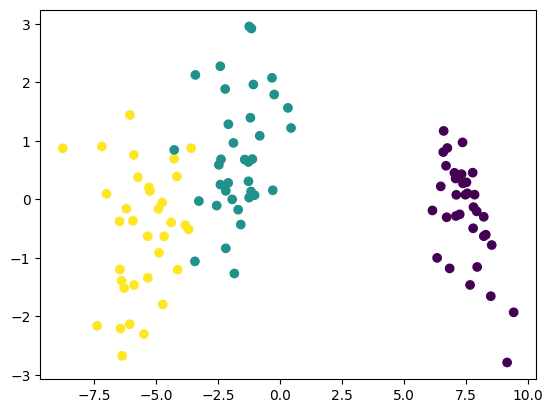

In [94]:
lda = LinearDiscriminantAnalysis()
X_new = lda.fit(X_train, y_train).transform(X_train)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y_train)
plt.show()

Видно, что функции работают одинаково и выводят одинаковые графики (отраженные относительно вертекальной оси)

# Изменение параметров

Учитывая, что изначальная точность равна единица, будет проблемно ее улучшить :)

In [95]:
# запуск с различными solver'ами

for solver in ['svd', 'lsqr', 'eigen']:
    clf = LinearDiscriminantAnalysis(solver=solver)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{accuracy = } for {solver = }")

accuracy = 1.0 for solver = 'svd'
accuracy = 1.0 for solver = 'lsqr'
accuracy = 1.0 for solver = 'eigen'
